# Restuarant Complexity

In [26]:
import sweetgreen as sg
import pandas as pd
import json
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates


In [2]:
restaurants = sg.utils.read_json("../data/cleaned/flattened_restaurants.json")
restaurant_df = pd.DataFrame(restaurants)

restaurant_df.shape

(207, 50)

In [3]:
restaurant_df.iloc[0]

Fri_end                                                                     22:00
Fri_start                                                                   10:30
Mon_end                                                                     22:00
Mon_start                                                                   10:30
Sat_end                                                                     22:00
Sat_start                                                                   10:30
Sun_end                                                                     22:00
Sun_start                                                                   10:30
Thu_end                                                                     22:00
Thu_start                                                                   10:30
Tue_end                                                                     22:00
Tue_start                                                                   10:30
Wed_end         

## Determine location complexity
Iterate through restaurants and ingredients to understand which restaurants have the most ingredeients and the most products

In [15]:
# list(restaurant_details.items())[0]
restaurant_details = sg.utils.read_json("../data/cleaned/indexed_restaurant_products.json")

restaurant_product_ingred = []
for menu_id, products in restaurant_details.items():
    restaurant_dict = {"menu_id":int(menu_id)}
    
    ingredients = set()
    for product in products:
        
        # Get count of product types
        product_category = product["category_name"]
        restaurant_dict[product_category]= restaurant_dict.get(product_category, 0) + 1
        
        # Add to restaurant set of ingredients
        ingredients.update(product["ingredient_ids"])
    
    restaurant_dict["Ingredient_Count"] = len(ingredients)
    restaurant_product_ingred.append(restaurant_dict)
restaurant_product_ingred[:5]

[{'menu_id': 161, 'salads': 10, 'warm bowls': 7, 'Ingredient_Count': 58},
 {'menu_id': 70,
  'beverages': 10,
  'warm bowls': 7,
  'salads': 10,
  'Ingredient_Count': 59},
 {'menu_id': 27,
  'beverages': 11,
  'warm bowls': 7,
  'salads': 10,
  'Ingredient_Count': 59},
 {'menu_id': 141, 'warm bowls': 7, 'salads': 10, 'Ingredient_Count': 58},
 {'menu_id': 121, 'warm bowls': 7, 'salads': 10, 'Ingredient_Count': 58}]

In [16]:
df_counts = pd.DataFrame(restaurant_product_ingred).fillna(0)

In [17]:
df_counts.head()

,Ingredient_Count,beverages,menu_id,plates,salads,sides,warm bowls
0,58,0.0,161,0.0,10,0.0,7
1,59,10.0,70,0.0,10,0.0,7
2,59,11.0,27,0.0,10,0.0,7
3,58,0.0,141,0.0,10,0.0,7
4,58,0.0,121,0.0,10,0.0,7


In [18]:
df_counts.shape

(207, 7)

In [19]:
restaurant_df_subset = restaurant_df[["menu_id", "is_outpost", "state", "city"]]
restaurant_df_subset.head()

,menu_id,is_outpost,state,city
0,1,False,DC,Washington
1,2,False,MD,Bethesda
2,3,False,DC,Washington
3,4,False,VA,Reston
4,5,False,VA,Arlington


In [23]:
df_merged = df_counts.merge(restaurant_df_subset, right_on="menu_id", left_on="menu_id").set_index("menu_id")

In [24]:
df_merged.head()

,Ingredient_Count,beverages,plates,salads,sides,warm bowls,is_outpost,state,city
menu_id,,,,,,,,,
161,58,0.0,0.0,10,0.0,7,True,NY,New York
70,59,10.0,0.0,10,0.0,7,False,NY,Brooklyn
27,59,11.0,0.0,10,0.0,7,False,DC,Washington
141,58,0.0,0.0,10,0.0,7,False,NY,Brooklyn
121,58,0.0,0.0,10,0.0,7,True,DC,Washington


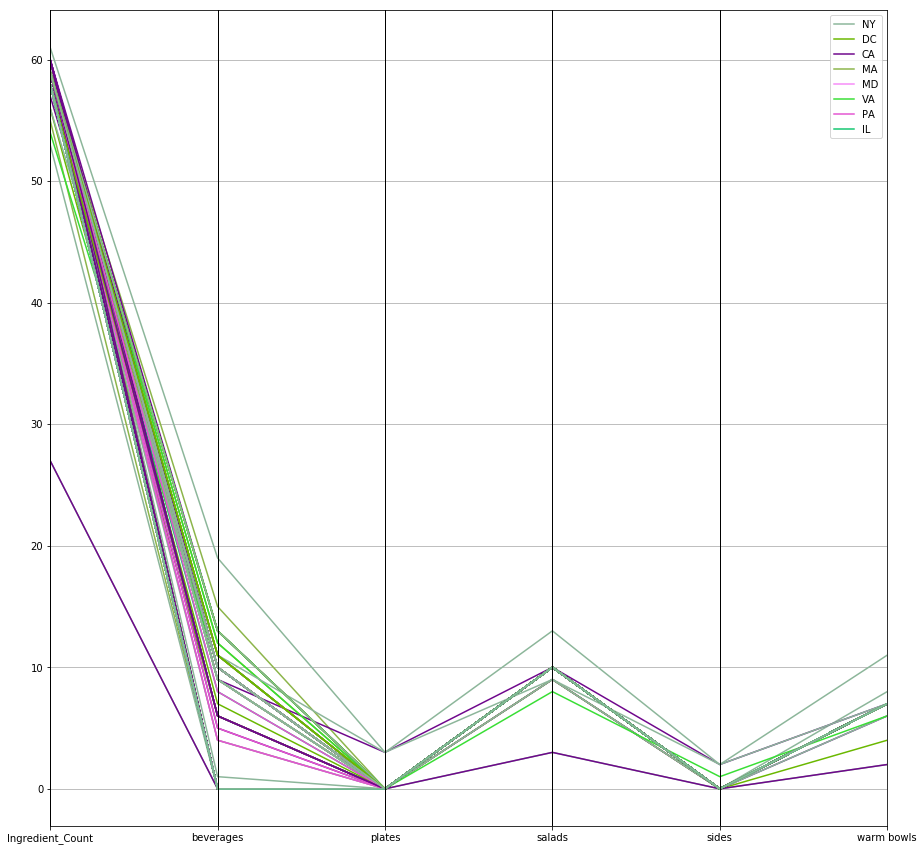

In [37]:
fig, ax = plt.subplots(figsize=(15,15))
parallel_coordinates(df_merged.drop(["city", "is_outpost"], axis=1), "state", ax=ax)

In [39]:
df_merged.sort_values(by="Ingredient_Count")

,Ingredient_Count,beverages,plates,salads,sides,warm bowls,is_outpost,state,city
menu_id,,,,,,,,,
189,27,0.0,0.0,3,0.0,2,False,CA,Marina del Rey
188,27,0.0,0.0,3,0.0,2,False,NY,New York
125,53,0.0,0.0,9,0.0,6,True,NY,New York
18,54,10.0,0.0,8,1.0,6,False,VA,McLean
186,55,0.0,0.0,9,0.0,7,True,MA,Boston
26,56,6.0,0.0,9,0.0,4,False,DC,Washington
187,56,11.0,3.0,9,2.0,7,False,NY,New York
60,57,11.0,0.0,9,0.0,7,False,CA,Culver City
124,58,0.0,0.0,10,0.0,7,True,NY,New York
